# Exploratory Data Analysis on Video Games Sales Dataset

- This is a personal project for the online course [Data Analysis with Python: Zero to Pandas](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas).
- In this project, I used Python open-source libraries `NumPy`, `Pandas`, `Matplotlib`, `seaborn`.
- As a learner of data analysis/data science and also a video game player, I choose the video games sales dataset to perform exploratory data analysis. Besides I need a close-to-business-world dataset to practice my Python skills, I thought this topic would be interesting and I was also excited to find some insights into video games and related businesses. 
- I would like to take this project as a showcase of my Python analysis skills. And at the same time, I would love to hear questions, comments, ideas, or feedback from readers. 

## By reading this notebook, you will know (I hope):
- Some usages and examples of some common-use Python libraries and functions. 
- The basic process of exploratory data analysis. 
- Some ideas of how to handle and visualize different categories of data. 
- Some insights into the global video games and related businesses. 
- Some interesting facts of video games. 

## Dataset Infomation

Before we actually started, the very first thing I should do (I hope you can do also) is to understand the dataset we will use. 

The description of the source dataset, these 16 columns/variables are defined as follow:

>- `Name` - The game's title
>- `Platform` - Platform of the games release (i.e. PC, PS2, Wii, Xbox360 etc.)
>- `Year_of_Release` - Year of the game's release
>- `Genre` - Genre of the game
>- `Publisher` - Publisher of the game
>- `NA_Sales` - Cumulative Units sold in North America since the game was released (in millions)
>- `EU_Sales` - Cumulative Units sold in Europe since the game was released (in millions)
>- `JP_Sales` - Cumulative Units sold in Japan since the game was released (in millions)
>- `Other_Sales` - Cumulative Units sold in the rest of the world since the game was released (in millions)
>- `Global_Sales` - Cumulative Units sold worldwide since the game was released (in millions)
>- `Critic_Score` - Weighted average score by **Metacritic** base on all published critic reviews (0-100 scale)
>- `Critic_Count` - The number of published critic reviews used in the `Critic_Score`
>- `User_Score` - Average score by users reviews on **Metacritic** (0-10 scale)
>- `User_Count` - The number of scores used in the `User_Score`
>-`Developer` - Developer of the game
>- `Rating` - The ESRB rating of the game. ([Ratings Guide](https://www.esrb.org/ratings-guide/))

**Note: All data are as of December 22nd, 2016.**

**Source:**\
[Video Games Sales Dataset](https://www.kaggle.com/sidtwr/videogames-sales-dataset?select=Video_Games_Sales_as_at_22_Dec_2016.csv)\
[Metascore](https://www.metacritic.com/about-metascores)


## Downloading the Dataset

- Because the source dataset is contributed by the user from [Kaggle](https://www.kaggle.com), I will download it to my local directory first. 

Let me import the `os` library and create a new directory called `data` where later I can store the dataset. 

In [1]:
import os
os.makedirs('./data', exist_ok = True)

Then download the `Video Games Sales Dataset`, which was contributed by `SID_TWR` from `Kaggle`, using the `download` function from `opendatasets` library. 

**Source:**\
[**Video Games Sales Dataset**](https://www.kaggle.com/sidtwr/videogames-sales-dataset?select=Video_Games_Sales_as_at_22_Dec_2016.csv)

In [2]:
import opendatasets as od

In [3]:
url = 'https://www.kaggle.com/sidtwr/videogames-sales-dataset?select=Video_Games_Sales_as_at_22_Dec_2016.csv'
od.download(url, './data', force = True)

100%|██████████| 507k/507k [00:00<00:00, 3.39MB/s]

Let's check what has been downloaded and extracted using the `listdir` function. 

In [4]:
os.listdir('./data/videogames-sales-dataset')

['PS4_GamesSales.csv',
 'Video_Games_Sales_as_at_22_Dec_2016.csv',
 'XboxOne_GameSales.csv']

There are three csv files and I will maily focus on the `Video_Games_Sales_as_at_22_Dec_2016.csv` since it included not only the sales data but also the score data by critics and users on [**Metacritic**](https://www.metacritic.com). 

## Data Preparation and Cleaning

- The first thing I would like to do before the data analysis is to read and load the dataset into Pandas `DataFrame`, then try to know and understand the dataset by getting some basic information about it. 
- Then do some data cleaning and handle the invalid values as well. 

Before load and read the dataset into a dataframe, we should install the `NumPy` and `Pandas` library. 

In [5]:
!pip install numpy --upgrade --quiet

In [6]:
!pip install pandas --upgrade --quiet

Then import both `NumPy` and `Pandas` library and alias them as `np` and `pd` respectively. 

In [7]:
import numpy as np, pandas as pd

Then read the csv file using `read_csv` function from `Pandas` library.\
The file will be read and stored as a Pandas `DataFrame` object and I name it `vgs_df`.

In [8]:
vgs_df = pd.read_csv('./data/videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')

We can check the `vgs_df` dataframe with some functions for more basic information. 

In [9]:
# check the number of rows and columns
vgs_df.shape

(16719, 16)

`vgs_df` has 16,719 rows and 16 columns which means there are 16,719 observations and 16 variables in the dataframe.

In [10]:
# check the top 10 rows
vgs_df.head(10) 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# # check the last 10 rows
vgs_df.tail(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.0,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN
16710,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,Atari,T
16711,Aiyoku no Eustia,PSV,2014.0,Misc,dramatic create,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16713,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# take a sample look
vgs_df.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
7916,Tom Clancy's Splinter Cell: Blacklist,PC,2013.0,Action,Ubisoft,0.04,0.13,0.00,0.01,0.19,82.0,13.0,7.4,754.0,Ubisoft Toronto,M
7117,3rd Super Robot Wars Z Jigoku Hen,PS3,2014.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.23,0.00,0.23,NaN,NaN,NaN,NaN,NaN,NaN
5193,Mobile Suit Z-Gundam,PS,1997.0,Action,Namco Bandai Games,0.00,0.00,0.34,0.02,0.36,NaN,NaN,NaN,NaN,NaN,NaN
8498,Guilty Gear Judgment,PSP,2006.0,Fighting,Majesco Entertainment,0.13,0.00,0.02,0.01,0.16,77.0,17.0,6.6,8.0,Arc System Works,T
5957,Kurohyou: Ryu ga Gotoku Shinshou,PSP,2010.0,Adventure,Sega,0.00,0.00,0.29,0.00,0.29,NaN,NaN,NaN,NaN,NaN,NaN
12154,Army Men: RTS,GC,2004.0,Strategy,Global Star,0.05,0.01,0.00,0.00,0.07,NaN,NaN,8.5,4.0,Pandemic Studios,T
9970,Yattaman DS: BikkuriDokkiri Daisakusen da Koron,DS,2008.0,Action,Takara Tomy,0.00,0.00,0.12,0.00,0.12,NaN,NaN,NaN,NaN,NaN,NaN
15466,Kawaii Koinu DS 3,DS,2010.0,Simulation,MTO,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
14668,Metal Dungeon,XB,2002.0,Role-Playing,Xicat Interactive,0.02,0.01,0.00,0.00,0.03,44.0,14.0,7.2,5.0,Panther Software,T
7288,The Crew,X360,2014.0,Racing,Ubisoft,0.06,0.14,0.00,0.02,0.22,NaN,NaN,6.4,94.0,Ivory Tower,T


In [13]:
# check the columns name 
vgs_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

Then let's check if there is any `NaN` (Not a Number) value which is missing value in each columns. 

In [14]:
vgs_df.isna().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

We can know that all the columns have `NaN` values except `Platform`, `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`. 

In [15]:
vgs_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

- There are 2 observations have missing values in `Name`.
- 269 observations have missing values in `Year_of_Release`.
- 2 observations have missing values in `Genre`.
- 54 observations have missing values in `Publisher`.
- 8582 observations have missing values in `Critic_Score` and `Critic_Count`.
- 9129 observations have missing values in `User_Score` and `User_Count`.
- 6623 observations have missing values in `Developer`.
- 6769 observations have missing values in `Rating`.

It is time to do some data cleaning, but I would save a copy of the dataframe before doing that in case something goes wrong. 

In [16]:
vgs_copy = vgs_df

In [17]:
# Let's check the two which has NaN in Name
vgs_df[vgs_df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# also check the two which has NaN in Genre.
vgs_df[vgs_df['Genre'].isna()]
# They are the same two rows.

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# I will drop these two rows which with index of 659 and 14246 and store back to the dataframe
# since they are missing names and many others values.  

vgs_df.drop([659,14246], inplace = True)

In [20]:
# check after data cleaning
vgs_df[['Name', 'Genre']].isna().any()

Name     False
Genre    False
dtype: bool

Also drop the 269 observations which have `NaN` in `Year_of_Release`.

In [21]:
vgs_df.dropna(axis = 0, subset = ['Year_of_Release'], inplace = True)

In [22]:
#check the result
vgs_df['Year_of_Release'].isna().sum()

0

In [23]:
# Since the dataset was only as of December 22th, 2016
# let me check the games released after 2016.

vgs_df[vgs_df.Year_of_Release > 2016]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,NaN,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Seems these four video games have invalid values in `Year_of_Release`, I will drop them directly as these four observations will not much affect our dataframe.

In [24]:
vgs_df.drop(vgs_df[vgs_df.Year_of_Release > 2016].index, inplace = True)

In [25]:
vgs_df['Year_of_Release'].agg(['min','max'])

min    1980.0
max    2016.0
Name: Year_of_Release, dtype: float64

Now the dataframe is only for the games that were released from 1980 to 2016.

For the `NA_Sales`,`EU_Sales`,`JP_Sales`,`Other_Sales` and `Global_Sales` five columns, based on the description of the priginal dataset,\
their values should follow this equation: `NA_Sales` + `EU_Sales` + `JP_Sales` + `Other_Sales` = `Global_Sales`

In [26]:
# Let me check
vgs_df[(vgs_df.NA_Sales + vgs_df.EU_Sales + vgs_df.JP_Sales + vgs_df.Other_Sales) != vgs_df.Global_Sales]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16238,Vanark,PS,1999.0,Shooter,Jaleco,0.01,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16256,Bratz: Forever Diamondz,PS2,2006.0,Adventure,THQ,0.01,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,Blitz Games,E
16292,K-1 Grand Prix,PS,1999.0,Fighting,Jaleco,0.01,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16680,G1 Jockey 4 2008,PS3,2008.0,Sports,Tecmo Koei,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Seems these 6,686 rows are not correct in `Global_Sales`, maybe there are typos when rounding. I will fix them using the same equation above. 

In [27]:
# subset these rows
sub = vgs_df[(vgs_df.NA_Sales + vgs_df.EU_Sales + vgs_df.JP_Sales + vgs_df.Other_Sales) != vgs_df.Global_Sales]

In [28]:
# calculate their Global_Sales using the equation
total = sub.NA_Sales + sub.EU_Sales + sub.JP_Sales + sub.Other_Sales

In [29]:
# replace the wrongs values with corret values according to wrong rows index in vgs_df
vgs_df.loc[sub.index, 'Global_Sales'] = total

In [30]:
# check whether all values are fixed
((vgs_df.NA_Sales + vgs_df.EU_Sales + vgs_df.JP_Sales + vgs_df.Other_Sales) == vgs_df.Global_Sales).all()

True

Since the value of `Year_of_Release` is in numeric format, we can conver it into `datetime` format and only use the year value. 

In [31]:
vgs_df['Year_of_Release'] = pd.to_datetime(vgs_df['Year_of_Release'], format = '%Y').dt.year

In [32]:
vgs_df.shape # After cleaning, there are 16,444 obsevations

(16444, 16)

In [33]:
vgs_df['Name'].nunique() # there are 11,426 unique obsevations

11426

I will work on these 16,444 obervations and 16 variables, note that only 11,426 among of them are unique, because some video games may release different platform versions. Which means there are around 5,000 observations in our dataframe are the same game title but in different platform. 

We can start the next part for explorary analysis and visulization.\
I am not going to handle the missing values in `Publisher`,`Critic_Score`,`Critic_Count`,`User_Score`,`User_Count`,`Developer` and `Rating` right now, maybe we will do that later.

## Exploratory Analysis and Visualization

Then we can actually start the exploratory data analysis and visualization by data manipulation and others more. 

For more statistics information of each numeric column, call the `describe` function to check, it will ignore the `NaN` values which is missing values in each column.

In [34]:
vgs_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7983.000000,7463.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,0.536023,68.994363,26.441313,7.126330,163.015141
std,5.875525,0.818378,0.506716,0.311100,0.188005,1.558786,13.920060,19.008136,1.499447,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,113.000000,9.700000,10665.000000


In [35]:
# install the matplotlib and seaborn libraries.
!pip install matplotlib seaborn --upgrade --quiet

In [36]:
# import and alias them
import matplotlib
import matplotlib.pyplot as plt, seaborn as sns

In [37]:
# set plot basic styles
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Histogram for the Number of Video Games Released Per 5-year
We can compare the number of video games released per 5-year from 1980 to 2016 by generating a histogram. 

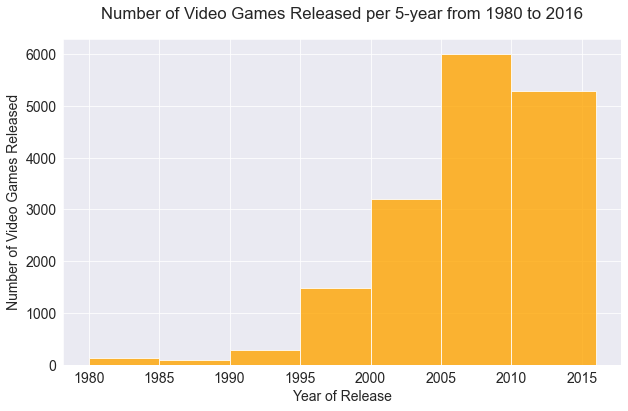

In [38]:
plt.hist(vgs_df.Year_of_Release, 
         bins = [1980,1985,1990,1995,2000,2005,2010,2016],
         color = 'orange',
         alpha = 0.8)

# add axis labels
plt.xlabel('Year of Release')
plt.ylabel('Number of Video Games Released')

# add title
plt.title('Number of Video Games Released per 5-year from 1980 to 2016',
         pad = 20);

Known from the plot, there are about 6,000 video games released between 2005 and 2010 which is the highest 5 years in our dataset, following by 2010 to 2016, this 6-year has about 5,200 games released. 

### Pie Chart of Global Sales by Region
We can compare cumulative units sold since the games were released till December 22th, 2016 in `NA_Sales`, `EU_Sales`, `JP_Sales`,`Other_Sales` four regions by a pie plot. 

In [39]:
# create a subset of sales data for these four regions
region_df = vgs_df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

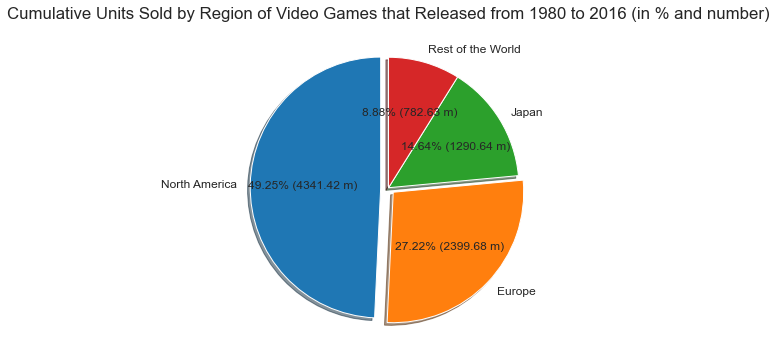

In [40]:
# generate and style a pie plot with the above regional subset data
subtotal = region_df.sum() # calculate the sales for each region
label = ['North America','Europe','Japan','Rest of the World'] 

# to inverse the autopct for the actual values
def make_autopct(subtotal):
        def inverse_autopct(pct):
            return '{p:.2f}% ({v:.2f} m)'.format(p = pct, v = pct*sum(subtotal)/100)
        return inverse_autopct

# plot and style
pie = plt.pie(subtotal, # values
        labels = label, # label for each section
        autopct = make_autopct(subtotal), # show data in percentage and values with two decimal places 
        explode = [0.06, 0.05, 0, 0], # to slice the particular sections
        textprops = {"fontsize" : 12}, # set the fontsize of the plot
        shadow = True, # set to show shadow
        startangle = 90) # set the angle for the first section

# add title
plt.title('Cumulative Units Sold by Region of Video Games that Released from 1980 to 2016 (in % and number)');

We can see that for the games released from 1980 to 2016, almost half of them have sold in North America, followed by Europe with a percentage of 27, which is more than half of the portion left by North America. 
- That is, over three-fourths of the video games have sold in North America and Europe. These two regions are two important markets for video games and related businesses. 

### Bar Plot for Global Sales by ESRB Rating
I will generate a bar plot to show the cumulative global units sold for each ESRB rating.

In [41]:
sales_by_rating = vgs_df.groupby('Rating')['Global_Sales'].sum().sort_values(ascending = False).to_frame()
sales_by_rating['Perc'] = round(sales_by_rating['Global_Sales'] / sales_by_rating['Global_Sales'].sum() * 100, 2)
sales_by_rating = sales_by_rating.reset_index()

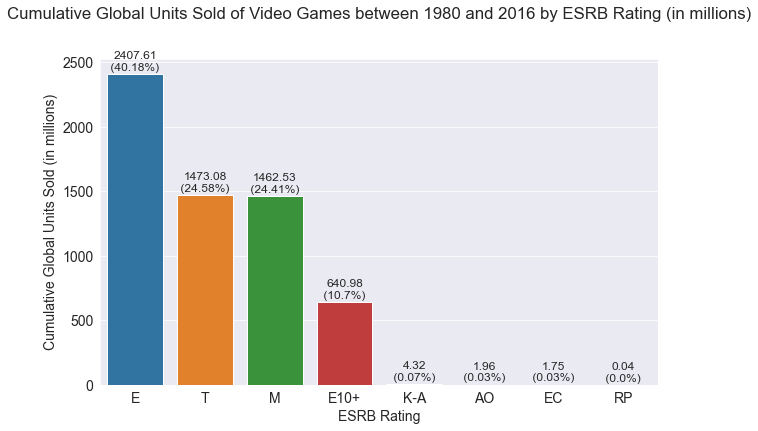

In [42]:
# genreate the bar plot using sns
bar_sales_by_rating = sns.barplot(y = 'Global_Sales', x = 'Rating', data = sales_by_rating)

# set title and axis labels
bar_sales_by_rating.set_title('Cumulative Global Units Sold of Video Games between 1980 and 2016 by ESRB Rating (in millions)',
          pad = 40)
bar_sales_by_rating.set_ylabel('Cumulative Global Units Sold (in millions)')
bar_sales_by_rating.set_xlabel('ESRB Rating')

# add pecentage for each rating bar using sns.annotate function 
for i in range(sales_by_rating.shape[0]):
    bar_sales_by_rating.annotate(str(round(sales_by_rating['Global_Sales'][i],2)) + '\n ('+ str(sales_by_rating['Perc'][i]) + '%) ',
                                 xy = (i, sales_by_rating['Global_Sales'][i] + 30),
                                 fontsize = 12,
                                 horizontalalignment = 'center');

- Seems about 90%  of the games are rated as E, T, and M based on the ESRB rating. 

### Bar Plot for Global Sales by Genre
Now I am interested in what are the popular genres of video games. I will generate a bar plot to show the cumulative global units sold for each genre.

In [43]:
# check what are the genres of games
vgs_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [44]:
# check how many of them
vgs_df['Genre'].nunique()

12

In [45]:
# create a subset and calculate the subtotal global sales and percentage by genre
sales_by_genre = vgs_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False).to_frame()
sales_by_genre['Perc'] = round(sales_by_genre['Global_Sales'] / sales_by_genre['Global_Sales'].sum() * 100, 2)
sales_by_genre = sales_by_genre.reset_index()

In [46]:
sales_by_genre

,Genre,Global_Sales,Perc
0,Action,1716.52,19.47
1,Sports,1309.67,14.86
2,Shooter,1041.36,11.81
3,Role-Playing,931.08,10.56
4,Platform,825.55,9.37
5,Misc,790.29,8.97
6,Racing,723.49,8.21
7,Fighting,442.66,5.02
8,Simulation,387.96,4.40
9,Puzzle,239.89,2.72


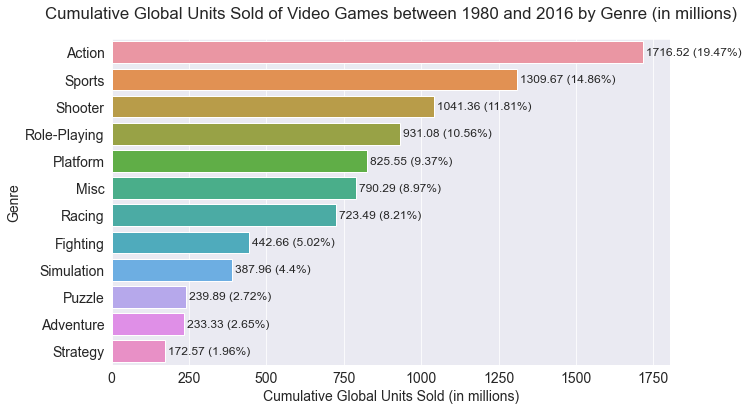

In [47]:
# genreate the bar plot using sns
bar_sales_by_genre = sns.barplot(x = 'Global_Sales',
                                 y = 'Genre',
                                 data = sales_by_genre,
                                 ci = None)

# set title and axis labels
bar_sales_by_genre.set_title('Cumulative Global Units Sold of Video Games between 1980 and 2016 by Genre (in millions)',
          pad = 20)
bar_sales_by_genre.set_xlabel('Cumulative Global Units Sold (in millions)')
bar_sales_by_genre.set_ylabel('Genre')

# add pecentage for each genre bar using sns.annotate function 
for i in range(sales_by_genre.shape[0]):
    bar_sales_by_genre.annotate(str(round(sales_by_genre['Global_Sales'][i],2)) + ' (' + str(sales_by_genre['Perc'][i]) + '%) ',
                                xy = (sales_by_genre['Global_Sales'][i]+10, i),
                                fontsize = 12, 
                                verticalalignment = 'center');

- It seems that action, sports, shooter and role-playing are the top four genres among all video games because their percentages are all over 10%. 

### Line Chart for Number of Video Games Released Each Year from 1980 to 2016
Now I want to see the trend of number of games relesed each year among these four genres from these years. 

**Note:** I was intended to check the sales trend but realized that the sales data are not yearly sales data. The sales data are cumulative units sold as of December 22th, 2016. 

In [48]:
# subset the observations that are the top four genres we found above
top_genre = vgs_df.query("Genre == ('Action', 'Sports', 'Shooter', 'Role-Playing')")

In [49]:
# calculate the number of games released each year for each genre
action = top_genre[top_genre.Genre == 'Action'].groupby('Year_of_Release')['Name'].count()
sports = top_genre[top_genre.Genre == 'Sports'].groupby('Year_of_Release')['Name'].count()
shoot = top_genre[top_genre.Genre == 'Shooter'].groupby('Year_of_Release')['Name'].count()
role = top_genre[top_genre.Genre == 'Role-Playing'].groupby('Year_of_Release')['Name'].count()

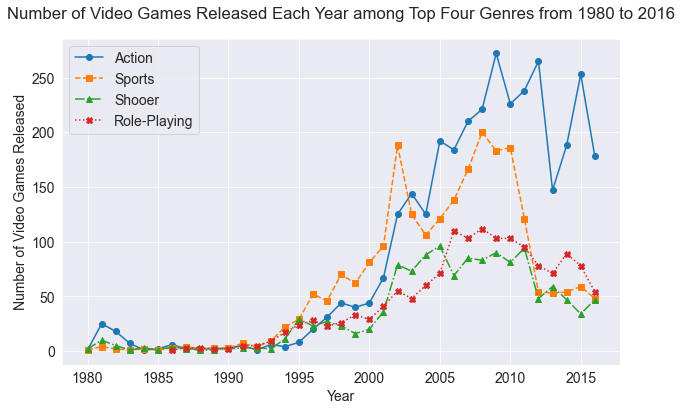

In [50]:
# plot and style lines for each genre using above pandas.series
plt.plot(action.index, action.values,'-o')
plt.plot(sports.index, sports.values, '--s')
plt.plot(shoot.index, shoot.values, '-.^')
plt.plot(role.index, role.values, ':X')

# add legend
plt.legend(['Action','Sports','Shooer','Role-Playing'])

# add labels for axis
plt.xlabel('Year')
plt.ylabel('Number of Video Games Released')

# add title
plt.title('Number of Video Games Released Each Year among Top Four Genres from 1980 to 2016',
          pad = 20);

- We can see there is a big increase at the beginning of the 21st century for action, sports and shooter three genres. 
- The sports genre (in orange dashed line) jumped from 60 to around 180 from 1999 to 2002. Then has a huge decline in 2011 and 2012, which is around 180 in 2010 to 50 in 2012. 
- Similarly, the action genre (in blue solid line) jumped from 75 to about 280 in 5 years. Then dropped from 270 to 150 in only one year in 2013. 

### Stacked Bar Chart of Cumulative Global Sales for Games by Top Games Developers Released in the 21st Century

Next, I am interested in what are the cumulative global sales of video games that were released after 1999 by the famous video games developers.\
As an experienced and below-average skilled video game player, I already have a target list of companies to checked.\
But let's check who are the top 10 developers on number of games released and the top 10 on total global sales between 1980 and 2016 for some ideas.

In [51]:
# top 10 developers on number of games released from 1980 to 2016.
vgs_df.groupby('Developer')['Name'].count().sort_values(ascending = False).head(10)

Developer
Ubisoft             200
EA Sports           169
EA Canada           164
Konami              158
Capcom              137
EA Tiburon          104
Electronic Arts     101
Ubisoft Montreal    100
Visual Concepts      98
Omega Force          80
Name: Name, dtype: int64

In [52]:
# top 10 developers global sales from 1980 to 2016.
vgs_df.groupby('Developer')['Global_Sales'].sum().sort_values(ascending = False).head(10)

Developer
Nintendo            531.78
EA Sports           173.10
EA Canada           138.14
Ubisoft             131.99
Rockstar North      119.48
Capcom              115.19
Ubisoft Montreal    107.46
Treyarch            101.50
EA Tiburon           88.83
Infinity Ward        77.64
Name: Global_Sales, dtype: float64

OK, now we have targets, they are as follow:
- `Ubisoft`: the top one with 200 games released these years whose headquartered in France.
[More Info](https://www.ubisoft.com/en-us/company/about-us/our-story)
- `Nintendo`: the top one with the highest global sales from 1980 to 2016 whose headquartered in Japan. [More Info](https://www.nintendo.com/about)
- `EA Sports`: the one with second-best on both the number of released and global sales. Mostly develop sports games according to its name (correct me if I am wrong). Headquartered in the U.S. [More Info](https://www.ea.com/ea-studios/ea-sports/about)
- `Rockstar North`: famous for the GTA series, the parent company is Take-Two Interactive whose headquarters are located in NYC. (Please let me know when GTA 6 is released.) [More Info](https://www.rockstarnorth.com/#about)
- `Capcom`: famous for Street Fighter series, Resident Evil series and Monster Hunter series. Headquartered in Japan. [More Info](https://www.capcom.com/us)

In [53]:
# create a subset of games by these five developers and released in the 21st century
top_dev_2000 = vgs_df.query("Developer == ('Ubisoft', 'Nintendo', 'EA Sports', 'Rockstar North', 'Capcom') & Year_of_Release >= 2000")

In [54]:
# select the columns needed
sales_top_dev_2000 = top_dev_2000[['Developer', 'Year_of_Release', 'Global_Sales']]

In [55]:
# calculate global sales on each year for these developers
ubi = sales_top_dev_2000[sales_top_dev_2000.Developer == 'Ubisoft'].groupby('Year_of_Release')['Global_Sales'].sum()
nin = sales_top_dev_2000[sales_top_dev_2000.Developer == 'Nintendo'].groupby('Year_of_Release')['Global_Sales'].sum()
eas = sales_top_dev_2000[sales_top_dev_2000.Developer == 'EA Sports'].groupby('Year_of_Release')['Global_Sales'].sum()
rs = sales_top_dev_2000[sales_top_dev_2000.Developer == 'Rockstar North'].groupby('Year_of_Release')['Global_Sales'].sum()
cap = sales_top_dev_2000[sales_top_dev_2000.Developer == 'Capcom'].groupby('Year_of_Release')['Global_Sales'].sum()

In [56]:
# check their length, should be 17
print('{} has {} rows.'.format('ubi', len(ubi)))
print('{} has {} rows.'.format('nin', len(nin)))
print('{} has {} rows.'.format('eas', len(eas)))
print('{} has {} rows.'.format('rs', len(rs)))
print('{} has {} rows.'.format('cap', len(cap)))

ubi has 17 rows.
nin has 14 rows.
eas has 17 rows.
rs has 8 rows.
cap has 17 rows.


We need to find the 3 missing values in `nin` and 9 missing values in `rs`.

In [57]:
nin.index # missing 2000, 2003 and 2016

Int64Index([2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015],
           dtype='int64', name='Year_of_Release')

I need to create new indices of 2000, 2003 and 2006 in the `nin` series and then fill them with 0.\
Again, the `Global_Sales` values are the cumulative units sold since the games were released till December 22th, 2016. Not the units sold that year. The `Year_of_Release` is the year when the game was released.\
So in our case here, I fill the years with 0 means the developer didn’t release games that year. 

In [58]:
# fill them with 0
nin[2000] = 0
nin[2003] = 0
nin[2016] = 0
nin = nin.sort_index()

In [59]:
rs.index # missing 2000, 2001, 2006, 2007, 2009, 2010, 2011, 2012 and 2016

Int64Index([2002, 2003, 2004, 2005, 2008, 2013, 2014, 2015], dtype='int64', name='Year_of_Release')

In [60]:
# fill them with 0
rs[2000] = 0
rs[2001] = 0
rs[2006] = 0
rs[2007] = 0
rs[2009] = 0
rs[2010] = 0
rs[2011] = 0
rs[2012] = 0
rs[2016] = 0
rs = rs.sort_index()

In [61]:
# create a DataFrame for our chart
stacked_bar_df = pd.DataFrame({'Year': ubi.index,
                               'Ubi Soft' : ubi.values,
                               'Nintendo' : nin.values,
                               'EA Sports': eas.values,
                               'Rockstar North': rs.values,
                               'Capcom': cap.values})

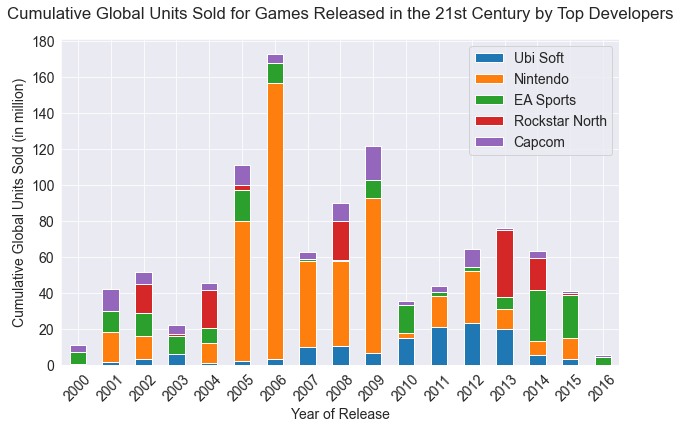

In [62]:
# generate and style a stacked bar chart
stacked_bar_df.set_index('Year').plot(kind = 'bar', stacked = True)

# add axis labels
plt.xlabel('Year of Release')
plt.ylabel('Cumulative Global Units Sold (in million)')

# add title
plt.title('Cumulative Global Units Sold for Games Released in the 21st Century by Top Developers',
          pad = 20)

#set y-axis range and interval
plt.yticks(range(0,200,20))

# rotate the xlabels
plt.xticks(rotation = 45);

In [63]:
# calculate the cumulative units sold for all games that 
# were developed by Nintendo from 1980 to 2016
vgs_df[vgs_df['Developer'] == 'Nintendo']['Global_Sales'].sum()

531.78

- We can see Nintendo (in orange) has three huge columns in the chart in 2005, 2006 and 2009. Especially the column in 2006, which indicates that the games were released in 2006 and developed by Nintendo have a cumulative global units sold of around 150 million till December 22th 2016. That is, those games released in 2006 by Nintendo sold around 150 million units in 10 years.
- Compare to the cumulative global units sold for all games from 1980 to 2016 by Nintendo, which is around 531.78 million; the games that were released in 2006 have taken more than 28% of it. That is a great hit in the video games market. I will take a close look to find out what games are they. 

In [64]:
# find out the games that were released in 2006 and developed by Nintendo
# select their names, global sales, platforms and genres
vgs_df.query("Developer == 'Nintendo' & Year_of_Release == 2006")[['Name','Platform','Genre','Global_Sales']]

,Name,Platform,Genre,Global_Sales
0,Wii Sports,Wii,Sports,82.54
6,New Super Mario Bros.,DS,Platform,29.80
7,Wii Play,Wii,Misc,28.91
107,The Legend of Zelda: Twilight Princess,Wii,Action,7.16
787,Tetris DS,DS,Puzzle,2.11
1162,The Legend of Zelda: Twilight Princess,GC,Action,1.59
2686,Metroid Prime Hunters,DS,Shooter,0.78


- Seems that in 2006, the Wii video game console was very popular in the console market. It makes sense that Wii was first released in November 2006 with its novel gameplay by their innovated wireless controller.
- As we can see from the above table, the game Will Sports and Wii Play add up with more than 110 million in cumulative global units sold till Dec 2016. Only for my guessing, that is because by combining the novel gameplay mode on Wii which enables players to interact with each other; and the sports and music genres, these games are popular among all-ages game players, which is suitable for parties or other social situations. 

## Asking and Answering Questions

Let me ask some interesting questions and try my best to answer them. 


#### Q1: What are the top one games based on the cumulative global units sold, Metacritic's critic scores, and user scores? 

In [65]:
top_gs = vgs_df[['Name','Year_of_Release','Platform','Global_Sales']].sort_values('Global_Sales', ascending = False).head(1)
print('The number one game in cumulative global unit sold is {} {} version released in {} with a record of {:.2f} million.'.format(top_gs.iat[0,0],top_gs.iat[0,2],top_gs.iat[0,1],top_gs.iat[0,3]))

The number one game in cumulative global unit sold is Wii Sports Wii version released in 2006 with a record of 82.54 million.


In [66]:
top_cs = vgs_df[['Name','Year_of_Release','Platform','Critic_Score']].sort_values('Critic_Score', ascending = False).head(1)
print('The number one game with the highest Critic Score is {} {} version released in {} with a score of {} in Metacritic.'.format(top_cs.iat[0,0],top_cs.iat[0,2],top_cs.iat[0,1],top_cs.iat[0,3]))

The number one game with the highest Critic Score is Grand Theft Auto IV X360 version released in 2008 with a score of 98.0 in Metacritic.


In [67]:
top_us = vgs_df[['Name','Year_of_Release','Platform','User_Score']].sort_values('User_Score', ascending = False).head(1)
print('The number one game with the highest User Score is {} {} version released in {} with a score of {} in Metacritic.'.format(top_us.iat[0,0],top_us.iat[0,2],top_us.iat[0,1],top_us.iat[0,3]))

The number one game with the highest User Score is Breath of Fire III PSP version released in 2005 with a score of 9.7 in Metacritic.


#### Q2: What are the top one game for each genre base on the cumulative global units sold? 

In [68]:
# Let me write a small function for this question

def topN_by_genre(n):
    act = vgs_df[vgs_df['Genre'] == 'Action'].sort_values('Global_Sales', ascending = False).head(n)
    spo = vgs_df[vgs_df['Genre'] == 'Sports'].sort_values('Global_Sales', ascending = False).head(n)
    sho = vgs_df[vgs_df['Genre'] == 'Shooter'].sort_values('Global_Sales', ascending = False).head(n)
    plat = vgs_df[vgs_df['Genre'] == 'Platform'].sort_values('Global_Sales', ascending = False).head(n)
    rac = vgs_df[vgs_df['Genre'] == 'Racing'].sort_values('Global_Sales', ascending = False).head(n)
    misc = vgs_df[vgs_df['Genre'] == 'Misc'].sort_values('Global_Sales', ascending = False).head(n)
    puz = vgs_df[vgs_df['Genre'] == 'Puzzle'].sort_values('Global_Sales', ascending = False).head(n)
    sim = vgs_df[vgs_df['Genre'] == 'Simulation'].sort_values('Global_Sales', ascending = False).head(n)
    rp = vgs_df[vgs_df['Genre'] == 'Role-Playing'].sort_values('Global_Sales', ascending = False).head(n)
    adv = vgs_df[vgs_df['Genre'] == 'Adventure'].sort_values('Global_Sales', ascending = False).head(n)
    stra = vgs_df[vgs_df['Genre'] == 'Strategy'].sort_values('Global_Sales', ascending = False).head(n)
    fig = vgs_df[vgs_df['Genre'] == 'Fighting'].sort_values('Global_Sales', ascending = False).head(n)
    
    df = act.append([spo, sho, rp, plat, fig, rac, adv, misc, puz, sim, stra])[['Name','Genre','Platform','Year_of_Release','Global_Sales']]
    
    return df

In [69]:
# input 1 for top one game for each genre
# if you want top three game, try to input 3
topN_by_genre(1)

,Name,Genre,Platform,Year_of_Release,Global_Sales
16,Grand Theft Auto V,Action,PS3,2013,21.05
0,Wii Sports,Sports,Wii,2006,82.54
9,Duck Hunt,Shooter,NES,1984,28.31
4,Pokemon Red/Pokemon Blue,Role-Playing,GB,1996,31.38
1,Super Mario Bros.,Platform,NES,1985,40.24
39,Super Smash Bros. Brawl,Fighting,Wii,2008,12.84
2,Mario Kart Wii,Racing,Wii,2008,35.52
50,Super Mario Land 2: 6 Golden Coins,Adventure,GB,1992,11.18
7,Wii Play,Misc,Wii,2006,28.91
5,Tetris,Puzzle,GB,1989,30.26


- I am so surprised to know that the most popular shooter game is *Duck Hunt* released in 1984 ! ! Which has a cumulative units sold of 28.31 million, poor ducks. 

#### Q3: What is the most popular genre and the most popular developer by region accoding to the cumulative units sold. 

In [70]:
# most popular genre by region 
vgs_df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,863.17,510.99,160.14,182.22
Adventure,101.52,63.20,52.24,16.37
Fighting,220.51,99.00,87.28,35.87
Misc,399.57,210.60,107.02,73.10
Platform,444.44,199.39,130.71,51.01
Puzzle,121.13,49.78,56.68,12.30
Racing,356.86,234.49,56.63,75.51
Role-Playing,330.04,188.24,353.39,59.41
Shooter,584.83,314.52,38.68,103.33


- The most popular genre in North America, Europe, Japan, and the rest of the world is action, action, role-playing, and action respectively. 

In [71]:
# most popular developer by region
dev_na = vgs_df.groupby('Developer')['NA_Sales'].sum().sort_values(ascending = False).head(1).reset_index().iat[0,0]
dev_eu = vgs_df.groupby('Developer')['EU_Sales'].sum().sort_values(ascending = False).head(1).reset_index().iat[0,0]
dev_jp = vgs_df.groupby('Developer')['JP_Sales'].sum().sort_values(ascending = False).head(1).reset_index().iat[0,0]
dev_oth = vgs_df.groupby('Developer')['Other_Sales'].sum().sort_values(ascending = False).head(1).reset_index().iat[0,0]

print('The most popular developer in North America is {}.'.format(dev_na))
print('The most popular developer in Europe is {}.'.format(dev_eu))
print('The most popular developer in Japan is {}.'.format(dev_jp))
print('The most popular developer in rest of the world is {}.'.format(dev_oth))

The most popular developer in North America is Nintendo.
The most popular developer in Europe is Nintendo.
The most popular developer in Japan is Nintendo.
The most popular developer in rest of the world is Nintendo.


- Well, seems **Nintendo** is favored by game players all over the world. 

I want to show Nintendo's logo here by using `PIL` to display an image. 

In [72]:
# import urlretrieve to download the image
from urllib.request import urlretrieve
urlretrieve('https://upload.wikimedia.org/wikipedia/commons/9/95/Nintendo_Logo_2017.png',
            'nin_logo.png');

In [73]:
# also import PIL library to read the image
from PIL import Image
nin_logo = Image.open('nin_logo.png')

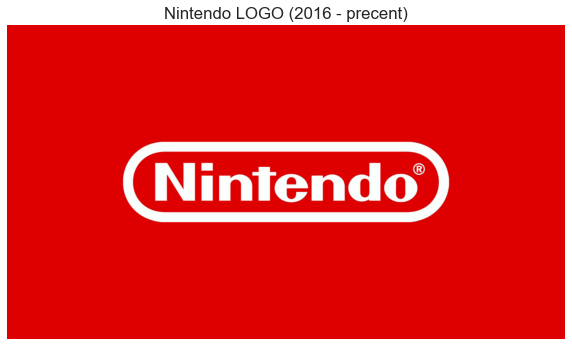

In [74]:
# display the image using imshow function then turn off the axis and grids
plt.imshow(nin_logo)
plt.axis('off')
plt.grid(False)
# add a title
plt.title('Nintendo LOGO (2016 - precent)');

#### Q4: What are the max, min, median and average critic score and user score for all games  on *Metacritic* by genre. 

In [75]:
vgs_df.groupby('Genre')[['Critic_Score','User_Score']].agg([np.min, np.max, np.median, np.mean,])

Critic_Score                         User_Score              \
                     amin  amax median       mean       amin amax median   
Genre                                                                      
Action               19.0  98.0   68.0  66.676931        0.3  9.5    7.4   
Adventure            17.0  93.0   66.0  65.268750        0.0  9.4    7.6   
Fighting             23.0  98.0   72.0  69.155556        0.9  9.2    7.6   
Misc                 19.0  93.0   69.0  66.648330        0.5  9.2    7.1   
Platform             19.0  97.0   69.5  68.124490        0.2  9.4    7.7   
Puzzle               25.0  90.0   70.0  67.231818        1.1  9.3    7.5   
Racing               13.0  96.0   69.0  68.006897        0.3  9.5    7.4   
Role-Playing         35.0  96.0   74.0  72.655267        1.4  9.7    7.8   
Shooter              27.0  97.0   73.0  70.260022        1.2  9.3    7.4   
Simulation           31.0  92.0   70.0  68.609195        2.1  9.6    7.5   
Sports               19.0  98.0   75.0  71.993133        0.2  9.5    7.4   
Strategy             35.0  94.0   73.0  72.158784        0.6  9.4    7.8   

                        
                  mean  
Genre                   
Action        7.058129  
Adventure     7.139597  
Fighting      7.295949  
Misc          6.805828  
Platform      7.305896  
Puzzle        7.138400  
Racing        7.040859  
Role-Playing  7.624423  
Shooter       7.053260  
Simulation    7.132153  
Sports        6.951434  
Strategy      7.294426

Note that `Critic_Score` is in 0-100 scale, `User_Score` is in 0-10 scale. 

#### Q5: Given the name of a game, evaluate it by the scores on *Metacritic*. 

I don't want to evaluate a game simply with its critic score and user score on *Metacritic*. I think it will be a good idea to make a **benchmark** for each genre then compare the game with it. 

In [76]:
# Let me check the critic count and user count on Metacritic by genre first.  
vgs_df.groupby('Genre')[['Critic_Count', 'User_Count']].agg([np.min,np.max,np.median,np.mean])

Critic_Count                          User_Count                  \
                     amin   amax median       mean       amin     amax median   
Genre                                                                           
Action                4.0  106.0   23.0  27.891950        4.0   8003.0   28.0   
Adventure             4.0  107.0   17.0  22.246875        4.0   2759.0   17.0   
Fighting              4.0   81.0   25.0  27.960494        4.0   1662.0   27.0   
Misc                  4.0   76.0   17.0  21.683694        4.0    471.0   13.0   
Platform              4.0   87.0   17.0  23.767347        4.0   5311.0   22.0   
Puzzle                4.0   78.0   14.0  20.454545        4.0    607.0   11.0   
Racing                4.0   90.0   17.0  23.121379        4.0   1599.0   17.0   
Role-Playing          4.0   98.0   30.0  32.514364        4.0  10665.0   50.0   
Shooter               4.0  113.0   32.0  35.679307        4.0   9851.0   61.0   
Simulation            4.0   75.0   17.0  21.419540        4.0   4572.0   20.0   
Sports                4.0   75.0   18.0  21.050644        4.0   1290.0   16.0   
Strategy              3.0  104.0   25.0  28.331081        4.0   6157.0   34.0   

                          
                    mean  
Genre                     
Action        188.763920  
Adventure     103.953020  
Fighting       64.597468  
Misc           30.799534  
Platform      109.674528  
Puzzle         33.120000  
Racing         69.228935  
Role-Playing  321.928087  
Shooter       378.280663  
Simulation     83.421829  
Sports         41.875116  
Strategy      198.413115

I will only take the scores for those games with more than 20 in `Critic_Count` and more than 50 in `User_Count` to make the benchmark for each genre. 

In [77]:
# defind a small function for the question
def eva_game():
    name = str(input('Please enter the full official name of the game you want to evaluate.'))
    game = vgs_df[vgs_df.Name == name][['Name','Genre','Platform','Year_of_Release','Critic_Score','Critic_Count','User_Score','User_Count']]
    bench = vgs_df.query("Critic_Count >= 20 & User_Count >= 50").groupby('Genre')[['Critic_Score','User_Score']].agg(np.mean).reset_index()
    
    cri_avg = "{:.1f}".format(bench[bench.Genre == game.iat[0,1]].iat[0,1])
    usr_avg = "{:.1f}".format(bench[bench.Genre == game.iat[0,1]].iat[0,2])
    game['Critic_Score_Benchmark'] = game['Name'].str.len()
    game['User_Score_Benchmark'] = game['Name'].str.len()
    game['Critic_Score_Benchmark'] = cri_avg
    game['User_Score_Benchmark'] = usr_avg

    return game

In [ ]:
# find a random game and extract its name to check
vgs_df.sample(1).iat[0,0]

In [78]:
eva_game()

Please enter the full official name of the game you want to evaluate.LEGO Harry Potter: Years 1-4


,Name,Genre,Platform,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Critic_Score_Benchmark,User_Score_Benchmark
638,LEGO Harry Potter: Years 1-4,Action,Wii,2010,79.0,13.0,8.0,34.0,77.1,7.5
700,LEGO Harry Potter: Years 1-4,Action,DS,2010,72.0,7.0,7.2,6.0,77.1,7.5
1203,LEGO Harry Potter: Years 1-4,Action,X360,2010,79.0,58.0,8.0,62.0,77.1,7.5
1497,LEGO Harry Potter: Years 1-4,Action,PS3,2010,79.0,42.0,8.0,52.0,77.1,7.5
2993,LEGO Harry Potter: Years 1-4,Action,PSP,2010,71.0,4.0,NaN,NaN,77.1,7.5
14759,LEGO Harry Potter: Years 1-4,Action,PC,2010,79.0,15.0,7.9,55.0,77.1,7.5


In my random sample, I got *LEGO Harry Potter: Years 1-4* which is a action game released in 2010 and have 6 different platform versions. 
- Its `Critic_Score` is around 79 for Wii, Xbox 360, PS3, and PC, but only has 72 and 71 in DS and PSP, seems the game does not perform well in the handheld game consoles. 
- Compared to its `Critic_Score_Benchmark` is 77.1, which is the average critic score for all action games with more than 20 critic count and 50 user count. It overall higher than the benchmark score. 
- The game's `Critic_Score` is overall higher than the benchmark score, so it seems this game is not bad. Well, if you are a fan of action games and a fan of Harry Potter, just give it a try. 

#### Q6: Can you create a function to generate a pie chart to show the regional cumulative sales in percentage by giving the name of a developer or publisher? 

Sounds interesting, let me do it.

In [79]:
def get_pie_RegionSales():
    intput = input("Please type 'dev' for developer or type 'pub' for publisher, then press enter.")
    name = input("Thanks, next please type the full name of the developer/publisher you want to check, then press enter.")
    
    # check the input is dev or pub then calculate the regional sales for the input name
    if str(intput) == "dev":
        sales = vgs_df[vgs_df.Developer == str(name)][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
    
        # create a function to inverse autopct
        def make_autopct(sales):
            def inverse_autopct(pct):
                return '{p:.2f}% ({v:.2f} m)'.format(p = pct, v = pct*sum(sales)/100)
            return inverse_autopct
        
        # start to plot
        label = ['North America','Europe','Japan','Rest of the World'] 
        plt.pie(sales, 
                labels = label,
                autopct = make_autopct(sales),
                explode = [0.03, 0.03, 0.03, 0.03],
                shadow = True,
                startangle = 80)
        plt.legend(loc = 4)
        plt.title('Cumulative Regional Units Sold of Video Games that Developed by {}'.format(name),
                  pad = 10)
        
    # if input is pub then check name for publisher
    elif str(intput) == 'pub':       
        sales = vgs_df[vgs_df.Publisher == str(name)][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
  
    # create a function to inverse autopct
        def make_autopct(sales):
            def inverse_autopct(pct):
                return '{p:.2f}% ({v:.2f} m)'.format(p = pct, v = pct*sum(sales)/100)
            return inverse_autopct

    # start to plot
        label = ['North America','Europe','Japan','Rest of the World'] 
        plt.pie(sales, 
                labels = label,
                autopct = make_autopct(sales),
                explode = [0.03, 0.03, 0.03, 0.03],
                shadow = True,
                startangle = 80)
        plt.legend(loc = 4)
        plt.title('Cumulative Regional Units Sold of Video Games that Published by {}'.format(name),
                 pad = 10)
        
    return plt.show()

In [ ]:
# to random select a publisher and extract the name
vgs_df.sample(1).iat[0,4]

In [ ]:
# to random select a developer and extract the name
vgs_df.sample(1).iat[0,-2]

Please type 'dev' for developer or type 'pub' for publisher, then press enter.pub
Thanks, next please type the full name of the developer/publisher you want to check, then press enter.Namco Bandai Games


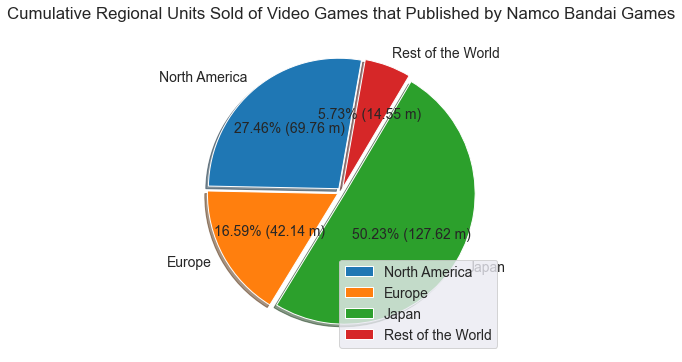

In [80]:
get_pie_RegionSales()

- In my case here, I randomly select a publisher called *Namco Bandai Games*, which is a Japanese multinational video game publisher headquartered in Tokyo, Japan. We can see that half of the cumulative units sold are in Japan, and the other around 45% are in North America and Europe. Seems they did a good job in the local region and not bad in the western world region. 

## Inferences and Conclusion

- More than 75% of the video games were sold in North America and Europe since they were released. These two regions are two important markets for video games and related businesses.
- There are about 6,000 games that were released between 2005 and 2010, that is about 3 games were released every day. 
- About 90% of the games sold are rated as E, T, and M based on the ESRB rating. 
- Action, sports, shooter, and role-playing are the top four genres among all video games. 
- The number one game in cumulative global unit sold is Wii Sports Wii version released in 2006 with a record of 82.54 million. 
- The number one game with the highest Critic Score is Grand Theft Auto IV X360 version released in 2008 with a score of 98.0 in Metacritic. 
- The number one game with the highest User Score is Breath of Fire III PSP version released in 2005 with a score of 9.7 in Metacritic. 
- The most popular genre in North America, Europe, Japan, and the rest of the world is action, action, role-playing, and action respectively. 
- Nintendo is the number one developer, with a cumulative global unit sold of 531.78 million for all their games that were released from 1980 to 2016. Compared to the total population worldwide in 2016 is about 7.4 billion, which means every one of fourteen people in the world has bought Nintendo’s game. 
- The most popular shooter game is Duck Hunt released in 1984, with a global unit sold of 28.31 million. 

## Future Work

- In the future, for a better and updated analysis, I would like to scrape and update for latest released games, latest sales data, and Metacritic scores. 
- For the data visualization, I will try to plot other types of charts and plot multiple charts in one grid. 
- Further, I am planning to learn about modeling using libraries `SciPy`, `SciKit-Learn` and others. 

## Thank you for reading!
I want to say thank you to Instructor [Aakash N S](https://twitter.com/aakashns) and also [Jovian](https://jovian.ai) for providing this great online course for free! 


To Python learners, enjoy coding!\
To game players, happy gaming! 

In [ ]:
# save and upload the notebook to jovian.ml using jovian.commit
!pip install jovian --upgrade -q
import jovian
jovian.commit(project = 'eda_video_games_cumulative_sales_1980_2016')

<IPython.core.display.Javascript object>